In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read the data from drive
data=pd.read_csv(r"E:\School_DataSets\chip_dataset.csv")


In [15]:
data

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,NaN,8,80,200,8700,1042.0,Samsung,NVIDIA,6021.0,6021.0,94.08
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,1/8/24,5,220,294,35800,1980.0,TSMC,NVIDIA,35480.0,35480.0,554.40
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,1/8/24,5,285,379,45900,2340.0,TSMC,NVIDIA,44100.0,44100.0,689.00
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,1/8/24,5,320,379,45900,2295.0,TSMC,NVIDIA,52220.0,52220.0,816.00


In [4]:
data.tail()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,NaN,8,80,200,8700,1042.0,Samsung,NVIDIA,6021.0,6021.0,94.08
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,1/8/24,5,220,294,35800,1980.0,TSMC,NVIDIA,35480.0,35480.0,554.40
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,1/8/24,5,285,379,45900,2340.0,TSMC,NVIDIA,44100.0,44100.0,689.00
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,1/8/24,5,320,379,45900,2295.0,TSMC,NVIDIA,52220.0,52220.0,816.00
4944,NVIDIA RTX 5880 Ada Generation,GPU,1/5/24,5,285,609,76300,1155.0,TSMC,NVIDIA,71810.0,71810.0,1122.00


## Explore the missingness in the dataset for categorical and numerical data


In [5]:
#Exploring missingness with pandas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [6]:
data.shape

(4945, 13)

In [7]:
data.isnull().sum()

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

##### Several columns have missing values Release Date, TDP, Die size, Transistors, Frequency, Foundry, FP16, FP32, FP64.
##### use missingno library to identify any patterns in the data that could explain the missingness

In [8]:
!pip install missingno

In [9]:
import missingno as mn

<Axes: >

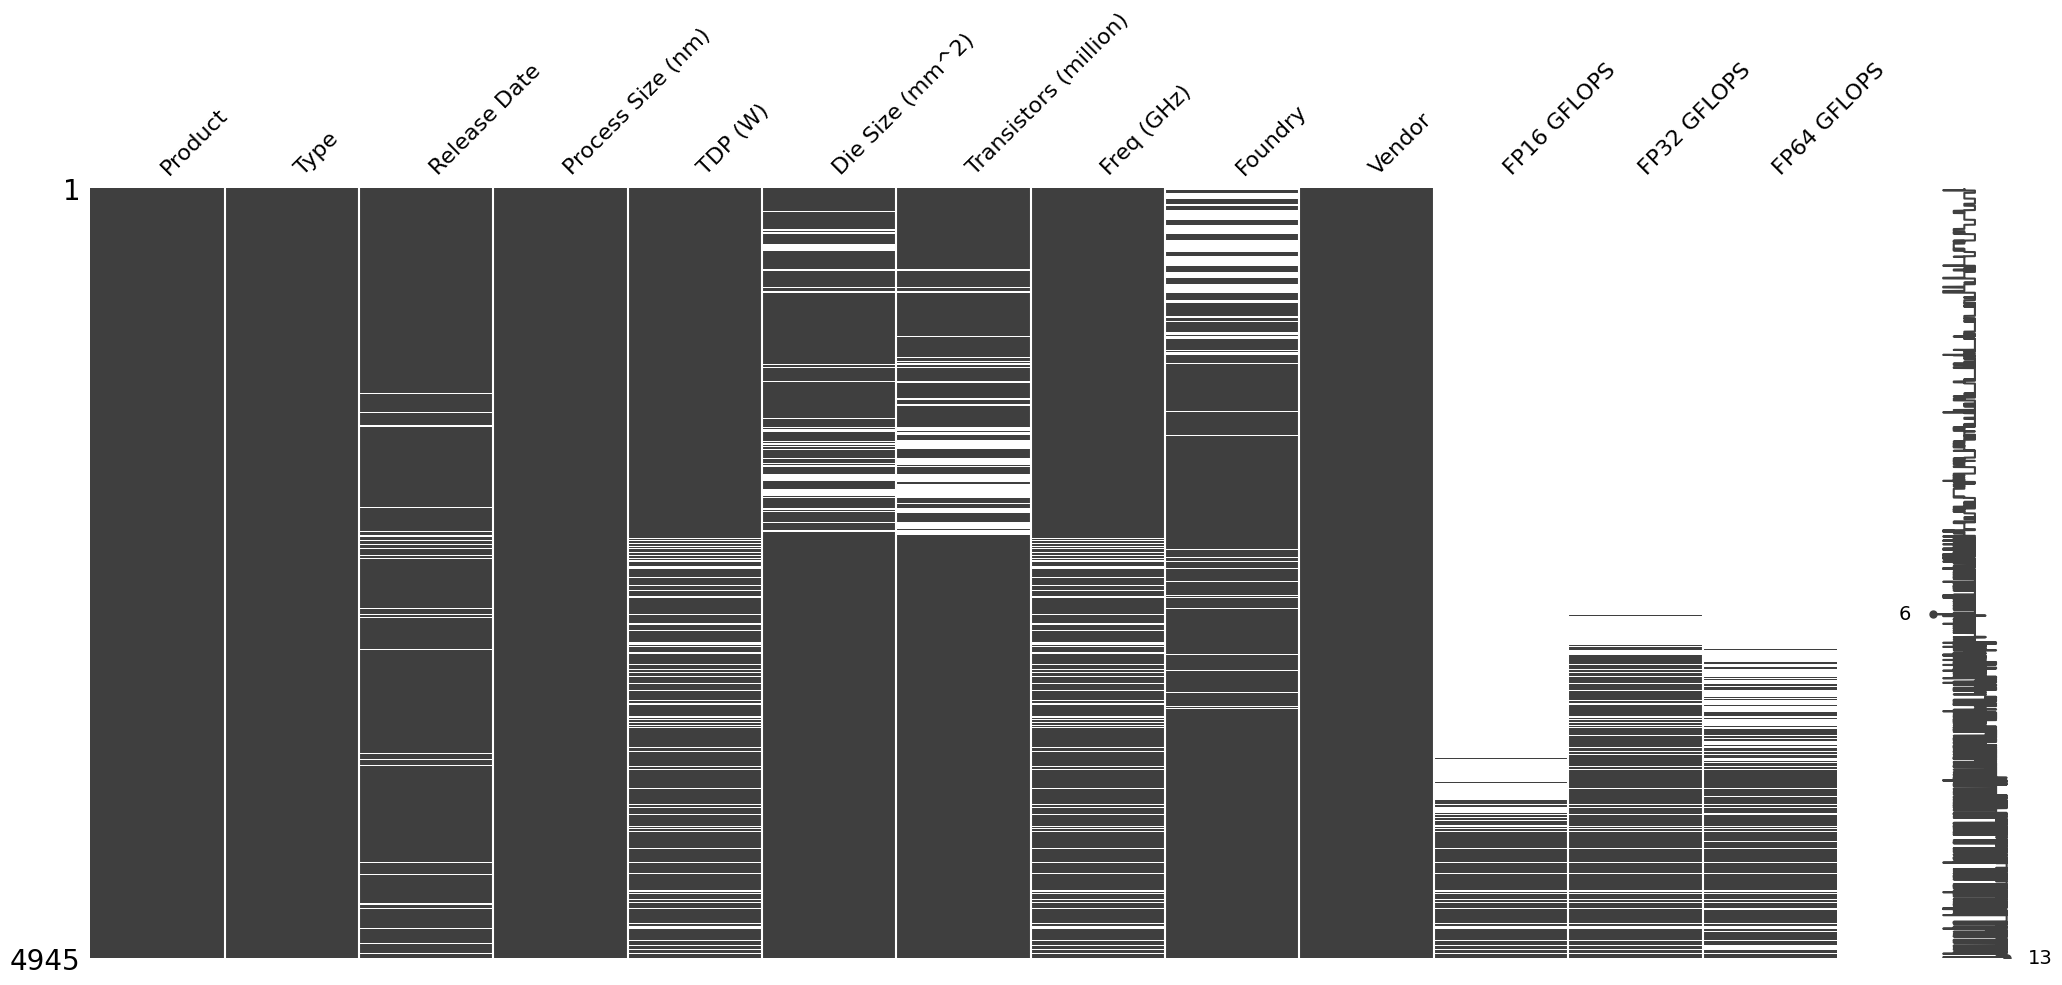

In [10]:
mn.matrix(data)

### Q1 :Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.


In [12]:
# impute missing values in release date using back/forward filling-used when there is a logical order to the data,
#use mean or median to impute TDW, die size and transistor
#use mode to impute foundry
#drop last 3 columns because 


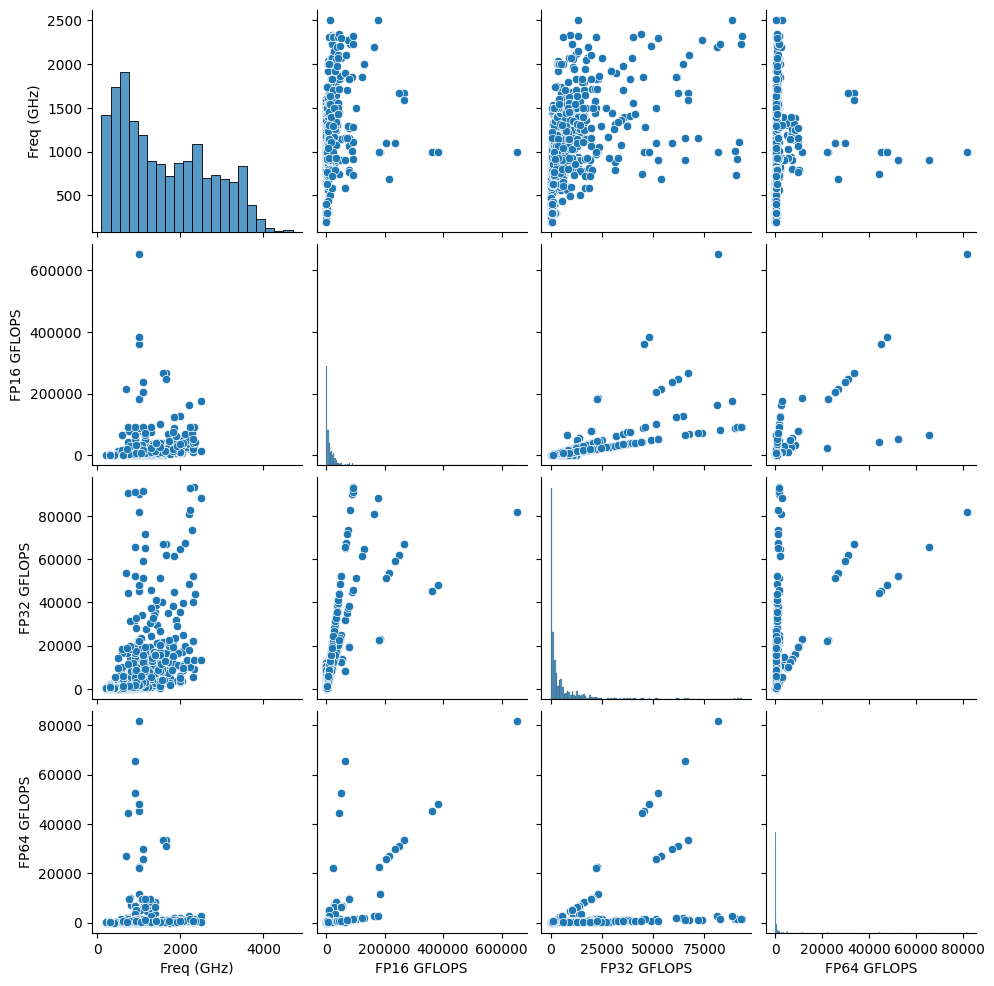

In [14]:
#draw pairplot to quickly visualize distributions
sns.pairplot(data)

plt.show()

#### Imputing release date missingness

In [17]:
data['Release Date'] = pd.to_datetime(data['Release Date'])

C:\Users\User\AppData\Local\Temp\ipykernel_1696\763962196.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Release Date'] = pd.to_datetime(data['Release Date'])


In [21]:
data.tail(20)

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
4925,NVIDIA RTX 2000 Mobile Ada Generation,GPU,2023-03-21,5,50,159,18900,1635.0,TSMC,NVIDIA,12990.0,12990.0,203.00
4926,NVIDIA RTX 3000 Mobile Ada Generation,GPU,2023-03-21,5,115,188,22900,1395.0,TSMC,NVIDIA,15620.0,15620.0,244.10
4927,NVIDIA RTX 3500 Mobile Ada Generation,GPU,2023-03-21,5,100,294,35800,1110.0,TSMC,NVIDIA,15820.0,15820.0,247.20
4928,NVIDIA RTX 4000 Ada Generation,GPU,2023-08-09,5,130,294,35800,1500.0,TSMC,NVIDIA,26730.0,26730.0,417.60
4929,NVIDIA RTX 4000 Mobile Ada Generation,GPU,2023-03-21,5,110,294,35800,1290.0,TSMC,NVIDIA,24720.0,24720.0,386.30
4930,NVIDIA RTX 4000 SFF Ada Generation,GPU,2023-03-21,5,70,294,35800,720.0,TSMC,NVIDIA,19170.0,19170.0,299.50
4931,NVIDIA RTX 4500 Ada Generation,GPU,2023-08-09,5,130,294,35800,2070.0,TSMC,NVIDIA,39630.0,39630.0,619.20
4932,NVIDIA RTX 5000 Ada Generation,GPU,2023-08-09,5,250,609,76300,1155.0,TSMC,NVIDIA,65280.0,65280.0,1020.00
4933,NVIDIA RTX 5000 Max-Q Ada Generation,GPU,2023-03-21,5,120,379,45900,930.0,TSMC,NVIDIA,32690.0,32690.0,510.70
4934,NVIDIA RTX 5000 Mobile Ada Embedded,GPU,2023-03-21,5,120,379,45900,1425.0,TSMC,NVIDIA,41150.0,41150.0,643.00


## Drop non-consequntial fields


## Transform temporal data to their corrrect format (date time)


## Perfom a full EDA and demonstrate the validity of the following assumption